In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# cab data

In [ ]:
cab_data = pd.read_csv('/content/drive/MyDrive/TAXİ_dataset/Cab_Data.csv')
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [ ]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [ ]:
#dateoftravel excel formatında gün şeklindedir bunu date formatına çeviriz
cab_data['Date'] = pd.to_datetime(cab_data['Date of Travel'], origin='1899-12-30', unit='D')

In [ ]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016-01-02
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016-01-07
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016-01-03
...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018-01-08
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018-01-04
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018-01-05
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018-01-05


In [ ]:
#when we look at the travel of year 2017 has the biggest amount.
cab_data["Date"].dt.year.value_counts()

,count
Date,
2017,128510
2018,123563
2016,107319


In [ ]:
cab_data['Year'] = cab_data['Date'].dt.year
cab_data['Month'] = cab_data['Date'].dt.month
cab_data['Day'] = cab_data['Date'].dt.day

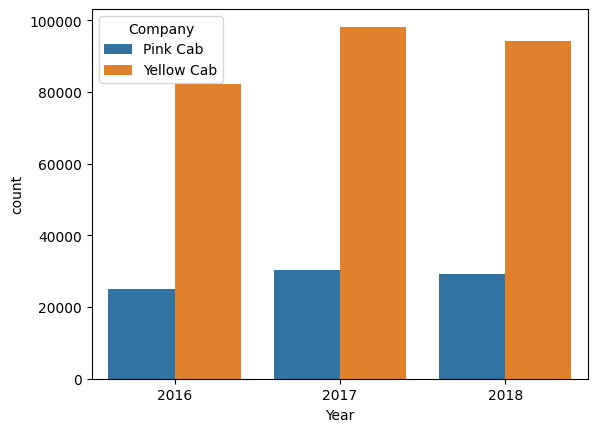

In [ ]:
year = cab_data.Date.dt.year
sns.countplot(data = cab_data, x = "Year", hue="Company");


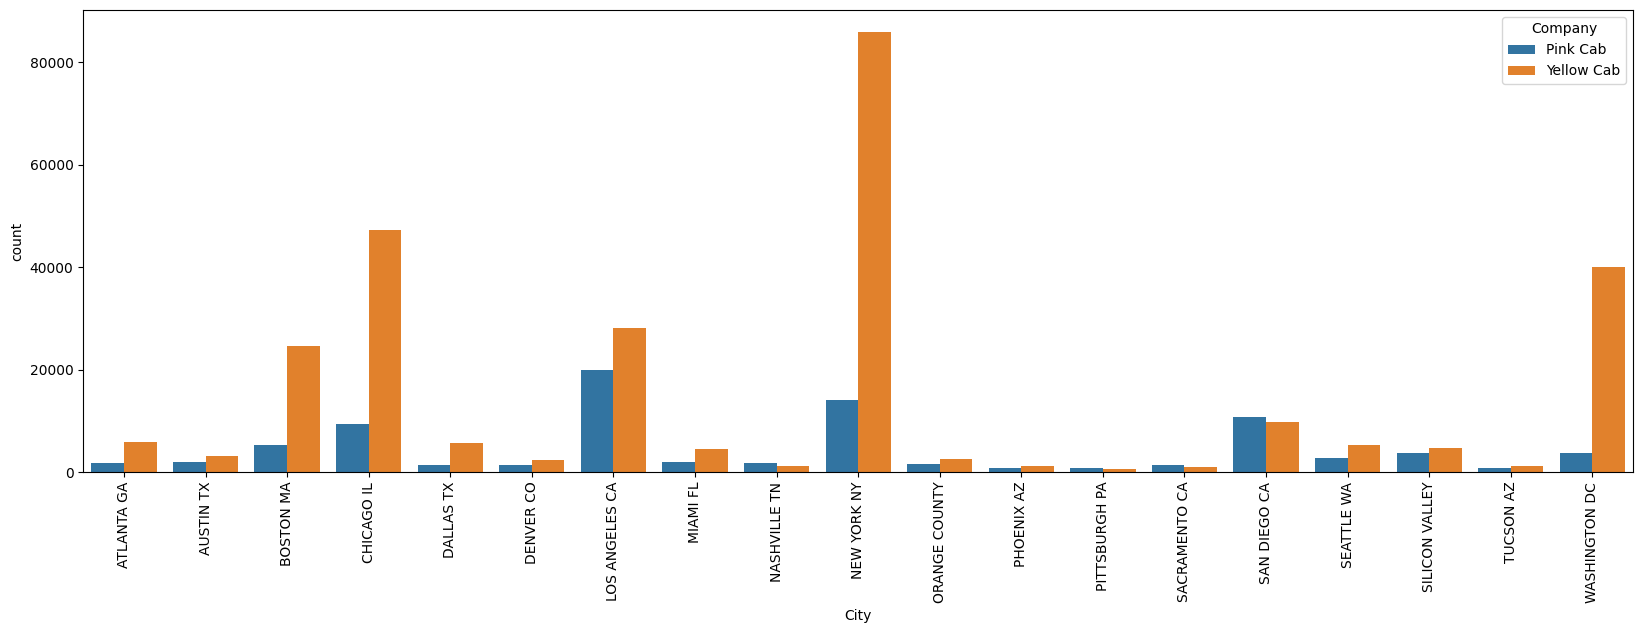

In [ ]:
plt.figure(figsize=(20, 6))
year = cab_data.Date.dt.year
sns.countplot(data = cab_data, x = "City", hue="Company");
plt.xticks(rotation=90);

# City

In [ ]:
city = pd.read_csv('/content/drive/MyDrive/TAXİ_dataset/City.csv')
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [ ]:
city['Users'] = city['Users'].str.replace(',', '', regex=False)
city['Population'] = city['Population'].str.replace(',', '', regex=False)

# Verileri sayısal formata dönüştürme
city['Users'] = pd.to_numeric(city['Users'], errors='coerce')
city['Population'] = pd.to_numeric(city['Population'], errors='coerce')

In [ ]:
merged_df = pd.merge(cab_data, city, on='City')
merged_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Year,Month,Day,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,2016,1,8,814885,24701
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,2016,1,6,814885,24701
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016-01-02,2016,1,2,814885,24701
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016-01-07,2016,1,7,814885,24701
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016-01-03,2016,1,3,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018-01-08,2018,1,8,418859,127001
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018-01-04,2018,1,4,418859,127001
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018-01-05,2018,1,5,418859,127001
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018-01-05,2018,1,5,418859,127001


In [ ]:
transaction = pd.read_csv('/content/drive/MyDrive/TAXİ_dataset/Transaction_ID.csv')
transaction

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [ ]:
cab_data['Transaction ID'].equals(transaction['Transaction ID'])


False

In [ ]:
# df1'de olup df2'de olmayan Transaction ID'leri bulma
only_in_df1 = cab_data[~cab_data['Transaction ID'].isin(transaction['Transaction ID'])]

# df2'de olup df1'de olmayan Transaction ID'leri bulma
only_in_df2 = transaction[~transaction['Transaction ID'].isin(cab_data['Transaction ID'])]

print("Only in df1:")
print(only_in_df1)

print("Only in df2:")
only_in_df2


Only in df1:
Empty DataFrame
Columns: [Transaction ID, Date of Travel, Company, City, KM Travelled, Price Charged, Cost of Trip, Date, Year, Month, Day]
Index: []
Only in df2:


,Transaction ID,Customer ID,Payment_Mode
192,10000203,43177,Card
193,10000204,44348,Cash
194,10000205,44599,Cash
195,10000206,44264,Cash
196,10000207,43369,Cash
...,...,...,...
440067,10440078,51612,Cash
440080,10440091,53963,Card
440091,10440102,52526,Cash
440092,10440103,53171,Card


In [ ]:
merged_df2 = pd.merge(merged_df, transaction, on='Transaction ID')
merged_df2

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Year,Month,Day,Population,Users,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,2016,1,8,814885,24701,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,2016,1,6,814885,24701,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016-01-02,2016,1,2,814885,24701,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016-01-07,2016,1,7,814885,24701,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016-01-03,2016,1,3,814885,24701,27182,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018-01-08,2018,1,8,418859,127001,52392,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018-01-04,2018,1,4,418859,127001,53286,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018-01-05,2018,1,5,418859,127001,52265,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018-01-05,2018,1,5,418859,127001,52175,Card


In [ ]:
merged_df2_2 = pd.merge(merged_df, transaction, on='Transaction ID', how='right')
merged_df2_2   # nan değerler de bulunuyor eşleşmeyen transaction ID'ler içerir

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Year,Month,Day,Population,Users,Customer ID,Payment_Mode
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,2016.0,1.0,8.0,814885.0,24701.0,29290,Card
1,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,2016.0,1.0,6.0,814885.0,24701.0,27703,Card
2,10000013,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016-01-02,2016.0,1.0,2.0,814885.0,24701.0,28712,Cash
3,10000014,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016-01-07,2016.0,1.0,7.0,814885.0,24701.0,28020,Cash
4,10000015,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016-01-03,2016.0,1.0,3.0,814885.0,24701.0,27182,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10440104,43104.0,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018-01-04,2018.0,1.0,4.0,418859.0,127001.0,53286,Cash
440094,10440105,43105.0,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018-01-05,2018.0,1.0,5.0,418859.0,127001.0,52265,Cash
440095,10440106,43105.0,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018-01-05,2018.0,1.0,5.0,418859.0,127001.0,52175,Card
440096,10440107,43102.0,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,2018-01-02,2018.0,1.0,2.0,418859.0,127001.0,52917,Card


In [ ]:
customer = pd.read_csv('/content/drive/MyDrive/TAXİ_dataset/Customer_ID.csv')
customer

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [ ]:
merged_df3 = pd.merge(merged_df2, customer, on='Customer ID')
merged_df3

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Year,Month,Day,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,2016,1,8,814885,24701,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,2018,7,21,814885,24701,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,2018,11,23,814885,24701,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,2016,1,6,814885,24701,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-21,2018,4,21,814885,24701,27703,Card,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,2018-03-03,2018,3,3,418859,127001,51406,Cash,Female,29,6829
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,2018-04-13,2018,4,13,418859,127001,51406,Cash,Female,29,6829
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,2018-07-06,2018,7,6,418859,127001,51406,Card,Female,29,6829
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,2018-08-02,2018,8,2,418859,127001,51406,Cash,Female,29,6829


In [ ]:
merged_df3_2 = pd.merge(merged_df2_2, customer, on='Customer ID')
merged_df3_2

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Year,Month,Day,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,2016.0,1.0,8.0,814885.0,24701.0,29290,Card,Male,28,10813
1,10351127,43302.0,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,2018.0,7.0,21.0,814885.0,24701.0,29290,Cash,Male,28,10813
2,10412921,43427.0,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,2018.0,11.0,23.0,814885.0,24701.0,29290,Card,Male,28,10813
3,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,2016.0,1.0,6.0,814885.0,24701.0,27703,Card,Male,27,9237
4,10320494,43211.0,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-21,2018.0,4.0,21.0,814885.0,24701.0,27703,Card,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10439799,43103.0,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,2018-01-03,2018.0,1.0,3.0,1177609.0,27247.0,12490,Cash,Male,33,18713
440094,10439820,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,14971,Card,Male,30,15346
440095,10439838,43104.0,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,2018-01-04,2018.0,1.0,4.0,631442.0,5712.0,41414,Card,Male,38,3960
440096,10439840,43106.0,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,2018-01-06,2018.0,1.0,6.0,631442.0,5712.0,41677,Cash,Male,23,19454


In [ ]:
merged_df3_2[merged_df3_2.duplicated(keep=False)].sort_values(by=list(merged_df3_2.columns))


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Year,Month,Day,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)


In [ ]:
# Mevsim sütunu ekleme
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

merged_df3['season'] = merged_df3['Month'].apply(get_season)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/TAXİ_dataset/merged_df.csv')
df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Year,Month,Day,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),season
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,2016,1,8,814885,24701,29290,Card,Male,28,10813,Winter
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,2018,7,21,814885,24701,29290,Cash,Male,28,10813,Summer
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,2018,11,23,814885,24701,29290,Card,Male,28,10813,Fall
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,2016,1,6,814885,24701,27703,Card,Male,27,9237,Winter
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-21,2018,4,21,814885,24701,27703,Card,Male,27,9237,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,2018-03-03,2018,3,3,418859,127001,51406,Cash,Female,29,6829,Spring
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,2018-04-13,2018,4,13,418859,127001,51406,Cash,Female,29,6829,Spring
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,2018-07-06,2018,7,6,418859,127001,51406,Card,Female,29,6829,Summer
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,2018-08-02,2018,8,2,418859,127001,51406,Cash,Female,29,6829,Summer


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Date                359392 non-null  object 
 8   Year                359392 non-null  int64  
 9   Month               359392 non-null  int64  
 10  Day                 359392 non-null  int64  
 11  Population          359392 non-null  int64  
 12  Users               359392 non-null  int64  
 13  Customer ID         359392 non-null  int64  
 14  Payment_Mode        359392 non-null  object 
 15  Gender              359392 non-nul

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,1.268058e+05,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
Date of Travel,359392.0,4.296407e+04,3.074672e+02,42371.0,4.269700e+04,42988.00,4.323200e+04,43465.00
KM Travelled,359392.0,2.256725e+01,1.223353e+01,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,2.743789e+02,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,1.579937e+02,19.0,1.512000e+02,282.48,4.136832e+02,691.20
Year,359392.0,2.017045e+03,8.002392e-01,2016.0,2.016000e+03,2017.00,2.018000e+03,2018.00
Month,359392.0,7.500434e+00,3.445095e+00,1.0,5.000000e+00,8.00,1.000000e+01,12.00
Day,359392.0,1.562845e+01,8.827151e+00,1.0,8.000000e+00,16.00,2.300000e+01,31.00
Population,359392.0,3.132198e+06,3.315194e+06,248968.0,6.712380e+05,1595037.00,8.405837e+06,8405837.00
Users,359392.0,1.583656e+05,1.008501e+05,3643.0,8.002100e+04,144132.00,3.021490e+05,302149.00


In [7]:
df.groupby(["City", "Company"])["KM Travelled"].mean()


City            Company   
ATLANTA GA      Pink Cab      22.539824
                Yellow Cab    22.248247
AUSTIN TX       Pink Cab      21.969176
                Yellow Cab    22.512840
BOSTON MA       Pink Cab      22.740746
                Yellow Cab    22.543649
CHICAGO IL      Pink Cab      22.511070
                Yellow Cab    22.659493
DALLAS TX       Pink Cab      22.021203
                Yellow Cab    22.599395
DENVER CO       Pink Cab      22.459218
                Yellow Cab    22.444097
LOS ANGELES CA  Pink Cab      22.635629
                Yellow Cab    22.688117
MIAMI FL        Pink Cab      22.299925
                Yellow Cab    22.635606
NASHVILLE TN    Pink Cab      22.528066
                Yellow Cab    22.968837
NEW YORK NY     Pink Cab      22.622415
                Yellow Cab    22.496362
ORANGE COUNTY   Pink Cab      22.213153
                Yellow Cab    22.364597
PHOENIX AZ      Pink Cab      21.747384
                Yellow Cab    22.529450
PITTSBURGH PA   Pink Cab      22.581613
                Yellow Cab    22.670523
SACRAMENTO CA   Pink Cab      22.604303
                Yellow Cab    22.949719
SAN DIEGO CA    Pink Cab      22.554710
                Yellow Cab    22.391995
SEATTLE WA      Pink Cab      22.694133
                Yellow Cab    22.583783
SILICON VALLEY  Pink Cab      22.791838
                Yellow Cab    22.696391
TUCSON AZ       Pink Cab      22.556909
                Yellow Cab    22.267527
WASHINGTON DC   Pink Cab      22.480756
                Yellow Cab    22.625514
Name: KM Travelled, dtype: float64

## Using a company as a gender

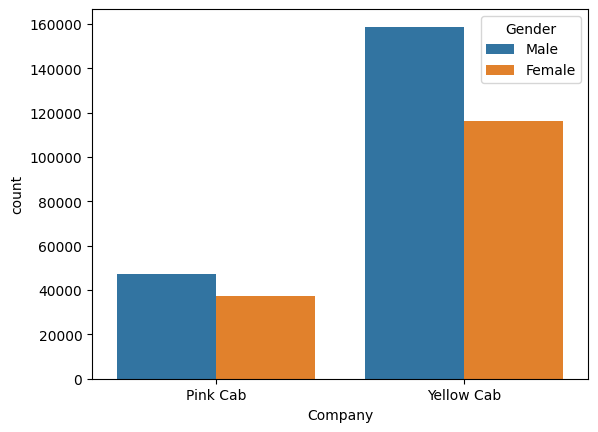

In [3]:
sns.countplot(data = df, x = "Company", hue="Gender");


In [4]:
df.Company.value_counts()

,count
Company,
Yellow Cab,274681
Pink Cab,84711


In [6]:
df.groupby(['Company', 'Gender']).size().unstack(fill_value=0)

Gender,Female,Male
Company,,
Pink Cab,37480,47231
Yellow Cab,116000,158681


In [10]:
grouped_data = df.groupby(['Gender', 'Age Group', 'Company']).size().reset_index(name='Count')

total_customers = df.groupby(['Gender', 'Age Group']).size().reset_index(name='Total Count')

segment_analysis_with_ratio = pd.merge(grouped_data, total_customers, on=['Gender', 'Age Group'])

segment_analysis_with_ratio['Company Ratio'] = segment_analysis_with_ratio['Count'] / segment_analysis_with_ratio['Total Count']

avg_km_price = df.groupby(['Gender', 'Age Group', 'Company'])[['KM Travelled', 'Price Charged']].mean().reset_index()

final_segment_analysis = pd.merge(avg_km_price, segment_analysis_with_ratio[['Gender', 'Age Group', 'Company', 'Company Ratio']],
                                  on=['Gender', 'Age Group', 'Company'])

final_segment_analysis


<ipython-input-10-1198cb7860d6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Gender', 'Age Group', 'Company']).size().reset_index(name='Count')
<ipython-input-10-1198cb7860d6>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_customers = df.groupby(['Gender', 'Age Group']).size().reset_index(name='Total Count')
<ipython-input-10-1198cb7860d6>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this war

,Gender,Age Group,Company,KM Travelled,Price Charged,Company Ratio
0,Female,0-18,Pink Cab,22.880341,314.890200,0.255794
1,Female,0-18,Yellow Cab,22.568126,449.701880,0.744206
2,Female,19-30,Pink Cab,22.664263,311.953439,0.245025
3,Female,19-30,Yellow Cab,22.517144,453.432964,0.754975
4,Female,31-45,Pink Cab,22.533626,309.524822,0.242144
5,Female,31-45,Yellow Cab,22.597753,455.186013,0.757856
6,Female,46-60,Pink Cab,22.531362,310.170853,0.241640
7,Female,46-60,Yellow Cab,22.750031,458.405198,0.758360
8,Female,60+,Pink Cab,22.317174,307.244585,0.253029
9,Female,60+,Yellow Cab,22.553513,450.004377,0.746971


## Marj calculation

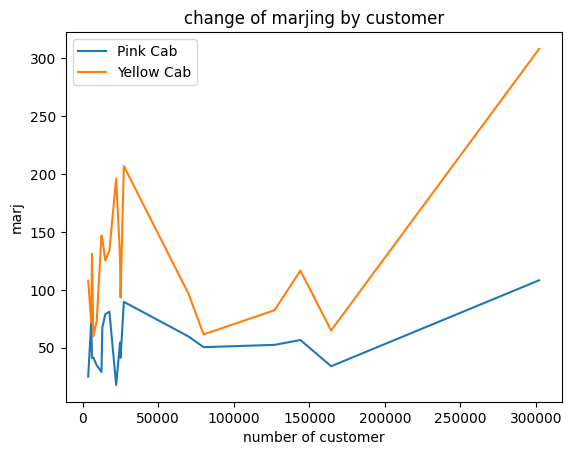

In [12]:
# calculating marj
df['Profit Margin'] = df['Price Charged'] - df['Cost of Trip']

profit_margin_vs_customers = df.groupby(['Company', 'Users'])['Profit Margin'].mean().reset_index()

import matplotlib.pyplot as plt

for company in profit_margin_vs_customers['Company'].unique():
    subset = profit_margin_vs_customers[profit_margin_vs_customers['Company'] == company]
    plt.plot(subset['Users'], subset['Profit Margin'], label=company)

plt.xlabel('number of customer')
plt.ylabel('marj')
plt.title('change of marjing by customer')
plt.legend()
plt.show()


## when we look at this figure, we realized the most of margin in 2016. In the 2018 margin decreased.

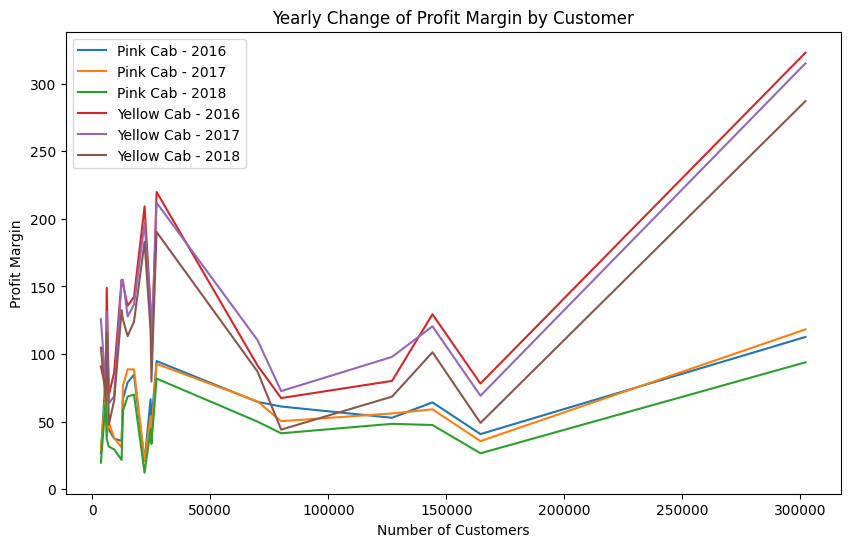

In [20]:
yearly_profit_margin = df.groupby(['Company', 'Year', 'Users'])['Profit Margin'].mean().reset_index()

plt.figure(figsize=(10, 6))
for company in yearly_profit_margin['Company'].unique():
    for year in yearly_profit_margin['Year'].unique():
        subset = yearly_profit_margin[(yearly_profit_margin['Company'] == company) & (yearly_profit_margin['Year'] == year)]
        plt.plot(subset['Users'], subset['Profit Margin'], label=f"{company} - {year}")

plt.xlabel('Number of Customers')
plt.ylabel('Profit Margin')
plt.title('Yearly Change of Profit Margin by Customer')
plt.legend()
plt.show()


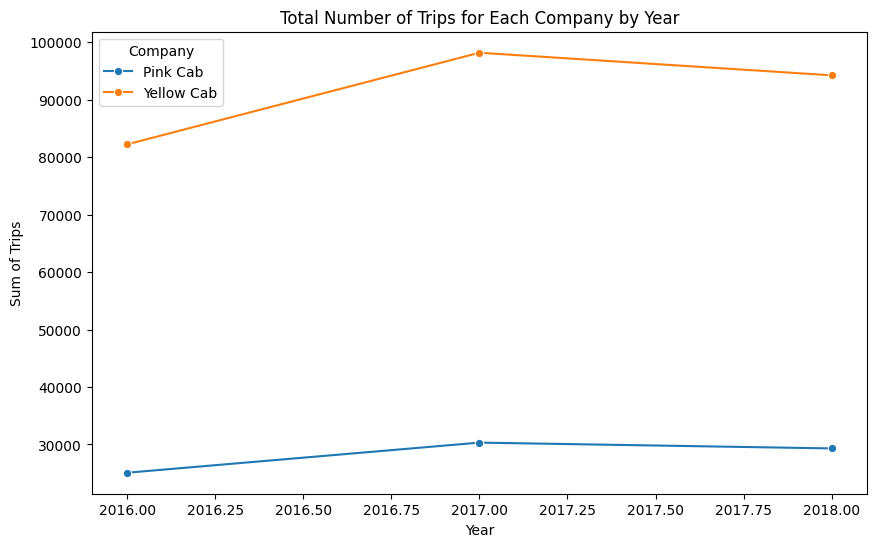

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

yearly_trips = df.groupby(['Year', 'Company'])['Transaction ID'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Transaction ID', hue='Company', data=yearly_trips, marker='o')
plt.title('Total Number of Trips for Each Company by Year')
plt.xlabel('Year')
plt.ylabel('Sum of Trips')
plt.show()


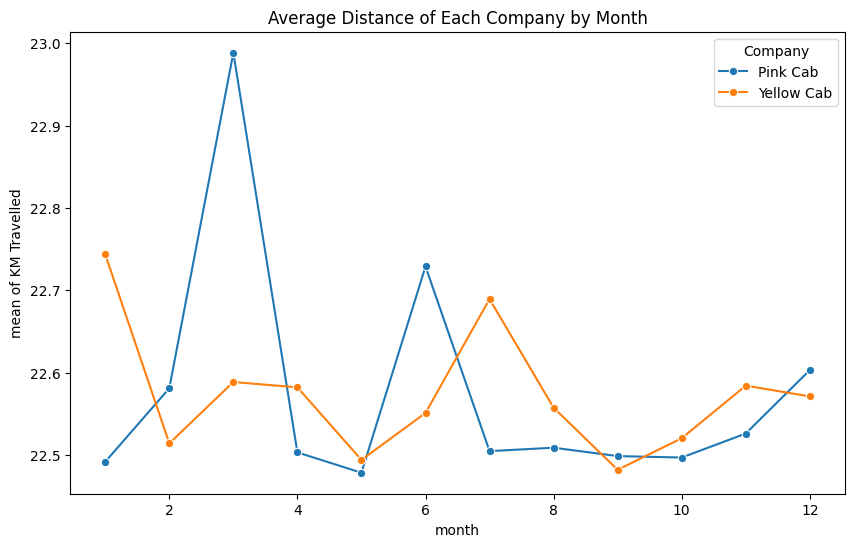

In [23]:
monthly_km = df.groupby(['Month', 'Company'])['KM Travelled'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='KM Travelled', hue='Company', data=monthly_km, marker='o')
plt.title('Average Distance of Each Company by Month')
plt.xlabel('month')
plt.ylabel('mean of KM Travelled')
plt.show()


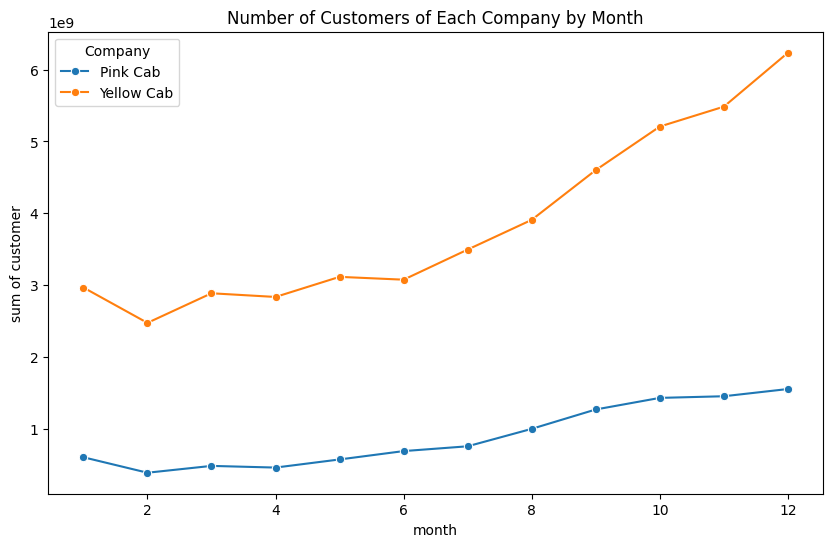

In [29]:
# Aylara göre müşteri sayısı
monthly_users = df.groupby(['Month', 'Company'])['Users'].sum().reset_index()

# Grafik oluşturma
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Users', hue='Company', data=monthly_users, marker='o')
plt.title('Number of Customers of Each Company by Month')
plt.xlabel('month')
plt.ylabel('sum of customer')
plt.show()


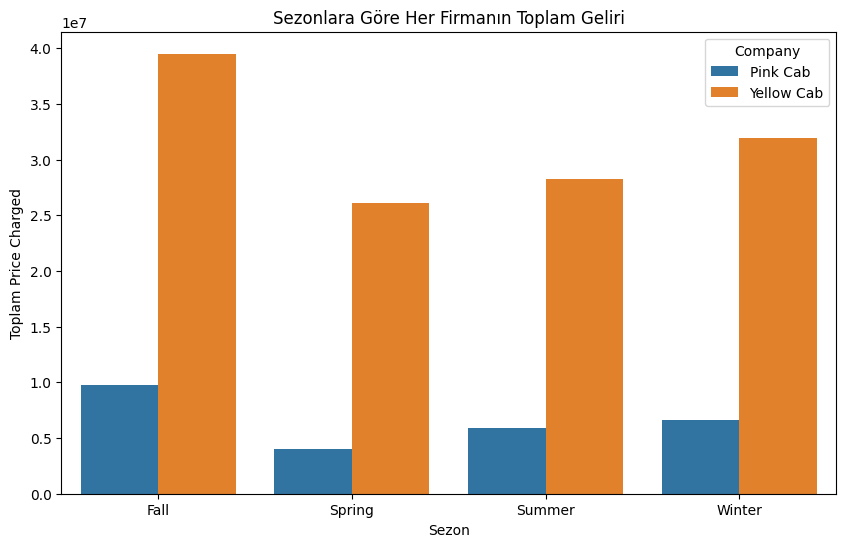

In [39]:
season_revenue = df.groupby(['season', 'Company'])['Price Charged'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='Price Charged', hue='Company', data=season_revenue)
plt.title('Sezonlara Göre Her Firmanın Toplam Geliri')
plt.xlabel('Sezon')
plt.ylabel('Toplam Price Charged')
plt.show()


In [33]:
city_company_counts = df.groupby(['City', 'Company']).size().unstack(fill_value=0)
df = df.merge(city_company_counts, on='City')
df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Year,Month,...,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),season,Age Group,Profit Margin,Pink Cab,Yellow Cab
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,2016,1,...,29290,Card,Male,28,10813,Winter,19-30,57.3150,1762,5795
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,2018,7,...,29290,Cash,Male,28,10813,Summer,19-30,281.2772,1762,5795
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,2018,11,...,29290,Card,Male,28,10813,Fall,19-30,194.6480,1762,5795
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,2016,1,...,27703,Card,Male,27,9237,Winter,19-30,23.6660,1762,5795
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-21,2018,4,...,27703,Card,Male,27,9237,Spring,19-30,253.9808,1762,5795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,2018-03-03,2018,3,...,51406,Cash,Female,29,6829,Spring,19-30,143.6180,3692,40045
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,2018-04-13,2018,4,...,51406,Cash,Female,29,6829,Spring,19-30,23.0464,3692,40045
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,2018-07-06,2018,7,...,51406,Card,Female,29,6829,Summer,19-30,-5.8540,3692,40045
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,2018-08-02,2018,8,...,51406,Cash,Female,29,6829,Summer,19-30,-6.0900,3692,40045


In [ ]:
df['Pink_cab_per_User'] = df['Pink Cab'] / df['Users']
df['Yellow_cab_per_User'] = df['Yellow Cab'] / df['Users']

In [ ]:
df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Year,Month,...,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),season,Pink Cab,Yellow Cab,Pink_cab_per_User,Yellow_cab_per_User
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,2016,1,...,29290,Card,Male,28,10813,Winter,1762,5795,0.071333,0.234606
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,2018,7,...,29290,Cash,Male,28,10813,Summer,1762,5795,0.071333,0.234606
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,2018,11,...,29290,Card,Male,28,10813,Fall,1762,5795,0.071333,0.234606
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,2016,1,...,27703,Card,Male,27,9237,Winter,1762,5795,0.071333,0.234606
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-21,2018,4,...,27703,Card,Male,27,9237,Spring,1762,5795,0.071333,0.234606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,2018-03-03,2018,3,...,51406,Cash,Female,29,6829,Spring,3692,40045,0.029071,0.315312
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,2018-04-13,2018,4,...,51406,Cash,Female,29,6829,Spring,3692,40045,0.029071,0.315312
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,2018-07-06,2018,7,...,51406,Card,Female,29,6829,Summer,3692,40045,0.029071,0.315312
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,2018-08-02,2018,8,...,51406,Cash,Female,29,6829,Summer,3692,40045,0.029071,0.315312


# Holidays added

In [42]:
holiday = pd.read_excel("holiday.xlsx")

In [43]:
holiday.rename(columns={"Tarih": "Date"}, inplace=True)
holiday['Date'] = pd.to_datetime(holiday['Date'])


In [45]:
# Her iki veri çerçevesinde de 'Date' sütunlarını datetime türüne çevir
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
holiday['Date'] = pd.to_datetime(holiday['Date'], errors='coerce')


In [46]:
df = df.merge(holiday, on="Date", how="left")
df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Year,Month,...,Payment_Mode,Gender,Age,Income (USD/Month),season,Age Group,Profit Margin,Pink Cab,Yellow Cab,Bayram / Önemli Gün
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,2016,1,...,Card,Male,28,10813,Winter,19-30,57.3150,1762,5795,NaN
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,2018,7,...,Cash,Male,28,10813,Summer,19-30,281.2772,1762,5795,NaN
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,2018,11,...,Card,Male,28,10813,Fall,19-30,194.6480,1762,5795,NaN
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,2016,1,...,Card,Male,27,9237,Winter,19-30,23.6660,1762,5795,NaN
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-21,2018,4,...,Card,Male,27,9237,Spring,19-30,253.9808,1762,5795,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,2018-03-03,2018,3,...,Cash,Female,29,6829,Spring,19-30,143.6180,3692,40045,NaN
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,2018-04-13,2018,4,...,Cash,Female,29,6829,Spring,19-30,23.0464,3692,40045,NaN
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,2018-07-06,2018,7,...,Card,Female,29,6829,Summer,19-30,-5.8540,3692,40045,NaN
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,2018-08-02,2018,8,...,Cash,Female,29,6829,Summer,19-30,-6.0900,3692,40045,NaN


In [48]:
df["Bayram / Önemli Gün"].fillna(0, inplace=True)

In [51]:
df[df["Bayram / Önemli Gün"]!=0]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Year,Month,...,Payment_Mode,Gender,Age,Income (USD/Month),season,Age Group,Profit Margin,Pink Cab,Yellow Cab,Bayram / Önemli Gün
129,10001395,42387,Pink Cab,ATLANTA GA,8.12,96.30,82.012,2016-01-18,2016,1,...,Card,Male,18,13969,Winter,0-18,14.288,1762,5795,Martin Luther King Jr. Day
146,10177167,42884,Yellow Cab,ATLANTA GA,16.95,321.61,229.842,2017-05-29,2017,5,...,Card,Male,28,34551,Spring,19-30,91.768,1762,5795,Memorial Day
147,10254439,43049,Yellow Cab,ATLANTA GA,10.50,200.42,147.420,2017-11-10,2017,11,...,Card,Male,28,34551,Fall,19-30,53.000,1762,5795,Veterans Day
231,10003124,42387,Yellow Cab,ATLANTA GA,47.60,918.47,611.184,2016-01-18,2016,1,...,Card,Male,38,13147,Winter,31-45,307.286,1762,5795,Martin Luther King Jr. Day
278,10049443,42555,Pink Cab,ATLANTA GA,19.72,203.13,228.752,2016-07-04,2016,7,...,Cash,Male,40,11777,Summer,31-45,-25.622,1762,5795,Independence Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359106,10193650,42920,Yellow Cab,WASHINGTON DC,18.36,251.38,253.368,2017-07-04,2017,7,...,Card,Female,65,17023,Summer,60+,-1.988,3692,40045,Independence Day
359151,10149324,42786,Yellow Cab,WASHINGTON DC,43.70,663.25,603.060,2017-02-20,2017,2,...,Card,Male,53,6225,Winter,46-60,60.190,3692,40045,Presidents' Day
359243,10287760,43101,Yellow Cab,WASHINGTON DC,19.72,332.32,260.304,2018-01-01,2018,1,...,Cash,Female,30,24800,Winter,19-30,72.016,3692,40045,New Year's Day
359289,10257225,43049,Yellow Cab,WASHINGTON DC,36.80,675.77,499.008,2017-11-10,2017,11,...,Card,Male,48,13859,Fall,46-60,176.762,3692,40045,Veterans Day


In [52]:
df.to_csv("merged_df2.csv", index=False)